In [1]:
%run clean_data.py

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data
imdb_all_years_df = pd.read_csv("./Resources/cleaned_data.csv")
imdb_all_years_df.info()
imdb_all_years_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13098 entries, 0 to 13097
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  13098 non-null  object 
 1   Movie Link             13098 non-null  object 
 2   Year                   13098 non-null  int64  
 3   Duration               13069 non-null  object 
 4   MPA                    12042 non-null  object 
 5   Rating                 13079 non-null  float64
 6   Votes                  13079 non-null  object 
 7   budget                 6064 non-null   float64
 8   grossWorldWide         8406 non-null   float64
 9   gross_US_Canada        8483 non-null   float64
 10  opening_weekend_Gross  7415 non-null   float64
 11  directors              13098 non-null  object 
 12  writers                13098 non-null  object 
 13  stars                  13098 non-null  object 
 14  genres                 13098 non-null  object 
 15  co

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
0,Swiss Family Robinson,Swiss Family Robinson,1960,2h 6m,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,...,"['John Mills', 'Dorothy McGuire', 'James MacAr...","['Survival', 'Adventure', 'Family']",['United States'],"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,1960.0
1,Psycho,Psycho,1960,1h 49m,R,8.5,741K,806947.0,32066835.0,32000000.0,...,"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']","['Psychological Horror', 'Psychological Thrill...",['United States'],"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,1960.0
2,The Apartment,The Apartment,1960,2h 5m,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,...,"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...","['Farce', 'Holiday Comedy', 'Holiday Romance',...",['United States'],"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,1960.0
3,Spartacus,Spartacus,1960,3h 17m,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,...,"['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...","['Adventure Epic', 'Historical Epic', 'Sword &...",['United States'],"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,1960.0
4,The Pusher,The Pusher,1960,1h 21m,Not Rated,6.2,168,NaN,1656.0,1656.0,...,"['Kathy Carlyle', 'Robert Lansing', 'Felice Or...","['Crime', 'Drama']",['United States'],"['113 East 115 Street, New York City, New York...",['Milford/Carlyle Productions'],['English'],0,0,0,1960.0


In [4]:
# Ensure 'grossWorldWide' is numeric (handle missing values and potential strings)
imdb_all_years_df["grossWorldWide"] = pd.to_numeric(imdb_all_years_df["grossWorldWide"], errors="coerce")

# Group by 'Year' and sum the 'grossWorldWide' revenue
global_box_office_by_year = imdb_all_years_df.groupby("Year")["grossWorldWide"].sum().reset_index()

# Display the first few rows
print(global_box_office_by_year.head())

   Year  grossWorldWide
0  1960      97455237.0
1  1961     291040677.0
2  1962       3471307.0
3  1963      72833402.0
4  1964     229541486.0


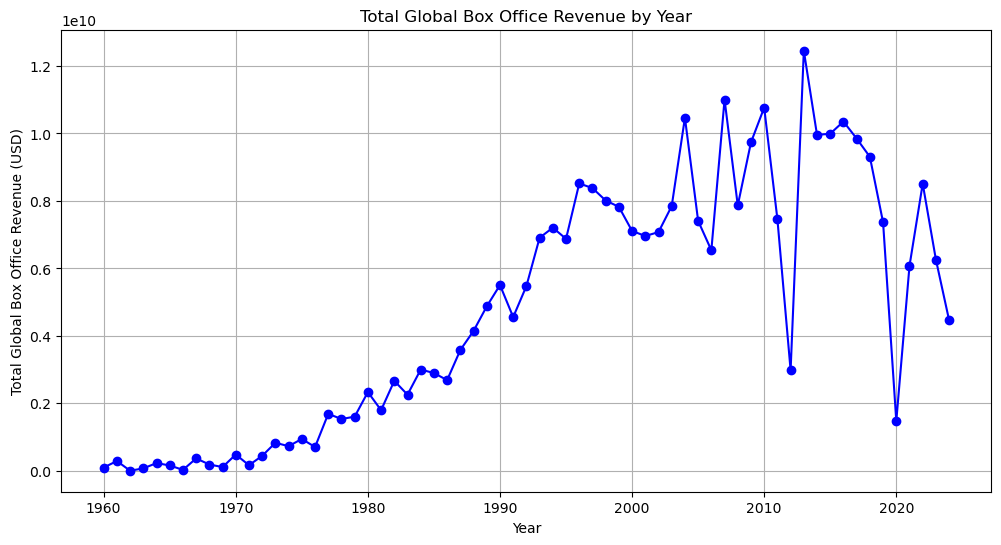

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(global_box_office_by_year["Year"], global_box_office_by_year["grossWorldWide"], marker="o", linestyle="-", color="b")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Global Box Office Revenue (USD)")
plt.title("Total Global Box Office Revenue by Year")
plt.grid(True)

# Show the plot
plt.show()

In [6]:
# Ensure 'grossWorldWide' is numeric
imdb_all_years_df["grossWorldWide"] = pd.to_numeric(imdb_all_years_df["grossWorldWide"], errors="coerce")

# Drop any movies where 'grossWorldWide' is missing
imdb_all_years_df = imdb_all_years_df.dropna(subset=["grossWorldWide"])

# Explode genres so that each movie-genre pair gets its own row
#imdb_all_years_df["genres"] = imdb_all_years_df["genres"].astype(str)  # Ensure it's a string
#imdb_all_years_df["genres"] = imdb_all_years_df["genres"].str.split(", ")  # Split into list
#imdb_exploded = imdb_all_years_df.explode("genres")  # Creates a new row for each genre

# Ensure 'genres' is a string and split it into lists
'''imdb_all_years_df["genres"] = imdb_all_years_df["genres"].astype(str).replace('[',"").replace(']',"").str.split(",")
'''
# Remove brackets and split manually, ensuring no extra spaces
imdb_all_years_df["genres"] = imdb_all_years_df["genres"].astype(str)  # Ensure it's a string
imdb_all_years_df["genres"] = imdb_all_years_df["genres"].str.replace("[", "").str.replace("]", "").str.replace("'", "")

# Now split by comma and strip spaces
imdb_all_years_df["genres"] = imdb_all_years_df["genres"].apply(lambda x: [g.strip().title() for g in x.split(",")])

# Strip whitespace from each genre before exploding
#imdb_all_years_df["genres"] = imdb_all_years_df["genres"].apply(lambda x: [g.strip() for g in x])
# Now explode
imdb_exploded = imdb_all_years_df.explode("genres")
imdb_exploded = imdb_exploded[~imdb_exploded["Title"].str.contains(r"Radical Wolfe", case=False, na=False)]
# Count the total number of movies per genre across all years
total_genre_counts = imdb_exploded["genres"].value_counts()

# Keep only genres that appear in at least 4 movies total
valid_genres = total_genre_counts[total_genre_counts >= 80].index.tolist()

# Filter the dataset to only include movies with valid genres
imdb_exploded = imdb_exploded[imdb_exploded["genres"].isin(valid_genres)]
imdb_all_years_df["genres"].head()

0                        [Survival, Adventure, Family]
1    [Psychological Horror, Psychological Thriller,...
2    [Farce, Holiday Comedy, Holiday Romance, Roman...
3    [Adventure Epic, Historical Epic, Sword & Sand...
4                                       [Crime, Drama]
Name: genres, dtype: object

In [7]:
# Group by Year and Genre, summing worldwide gross
genre_box_office = (
    imdb_exploded.groupby(["Year", "genres"])["grossWorldWide"].sum().reset_index()
)

# Get total box office per year
total_box_office_by_year = (
    imdb_all_years_df.groupby("Year")["grossWorldWide"].sum().reset_index()
)

# Merge to compute percentages
genre_box_office = genre_box_office.merge(
    total_box_office_by_year, on="Year", suffixes=("_genre", "_total")
)

# Compute percentage of total revenue for each genre
genre_box_office["percent_of_total"] = (
    genre_box_office["grossWorldWide_genre"] / genre_box_office["grossWorldWide_total"]
) * 100

# Preview results
print(genre_box_office.head())


   Year     genres  grossWorldWide_genre  grossWorldWide_total  \
0  1960     Action               13050.0            97455237.0   
1  1960  Adventure            42216914.0            97455237.0   
2  1960  Biography             1846975.0            97455237.0   
3  1960     Comedy            18779974.0            97455237.0   
4  1960      Crime                4703.0            97455237.0   

   percent_of_total  
0          0.013391  
1         43.319287  
2          1.895203  
3         19.270359  
4          0.004826  


In [8]:
# Count the number of movies per genre per year
genre_counts = imdb_exploded.groupby(["Year", "genres"]).size().reset_index(name="movie_count")

# Merge with genre revenue data
genre_box_office = genre_box_office.merge(genre_counts, on=["Year", "genres"])






<Figure size 2400x600 with 0 Axes>

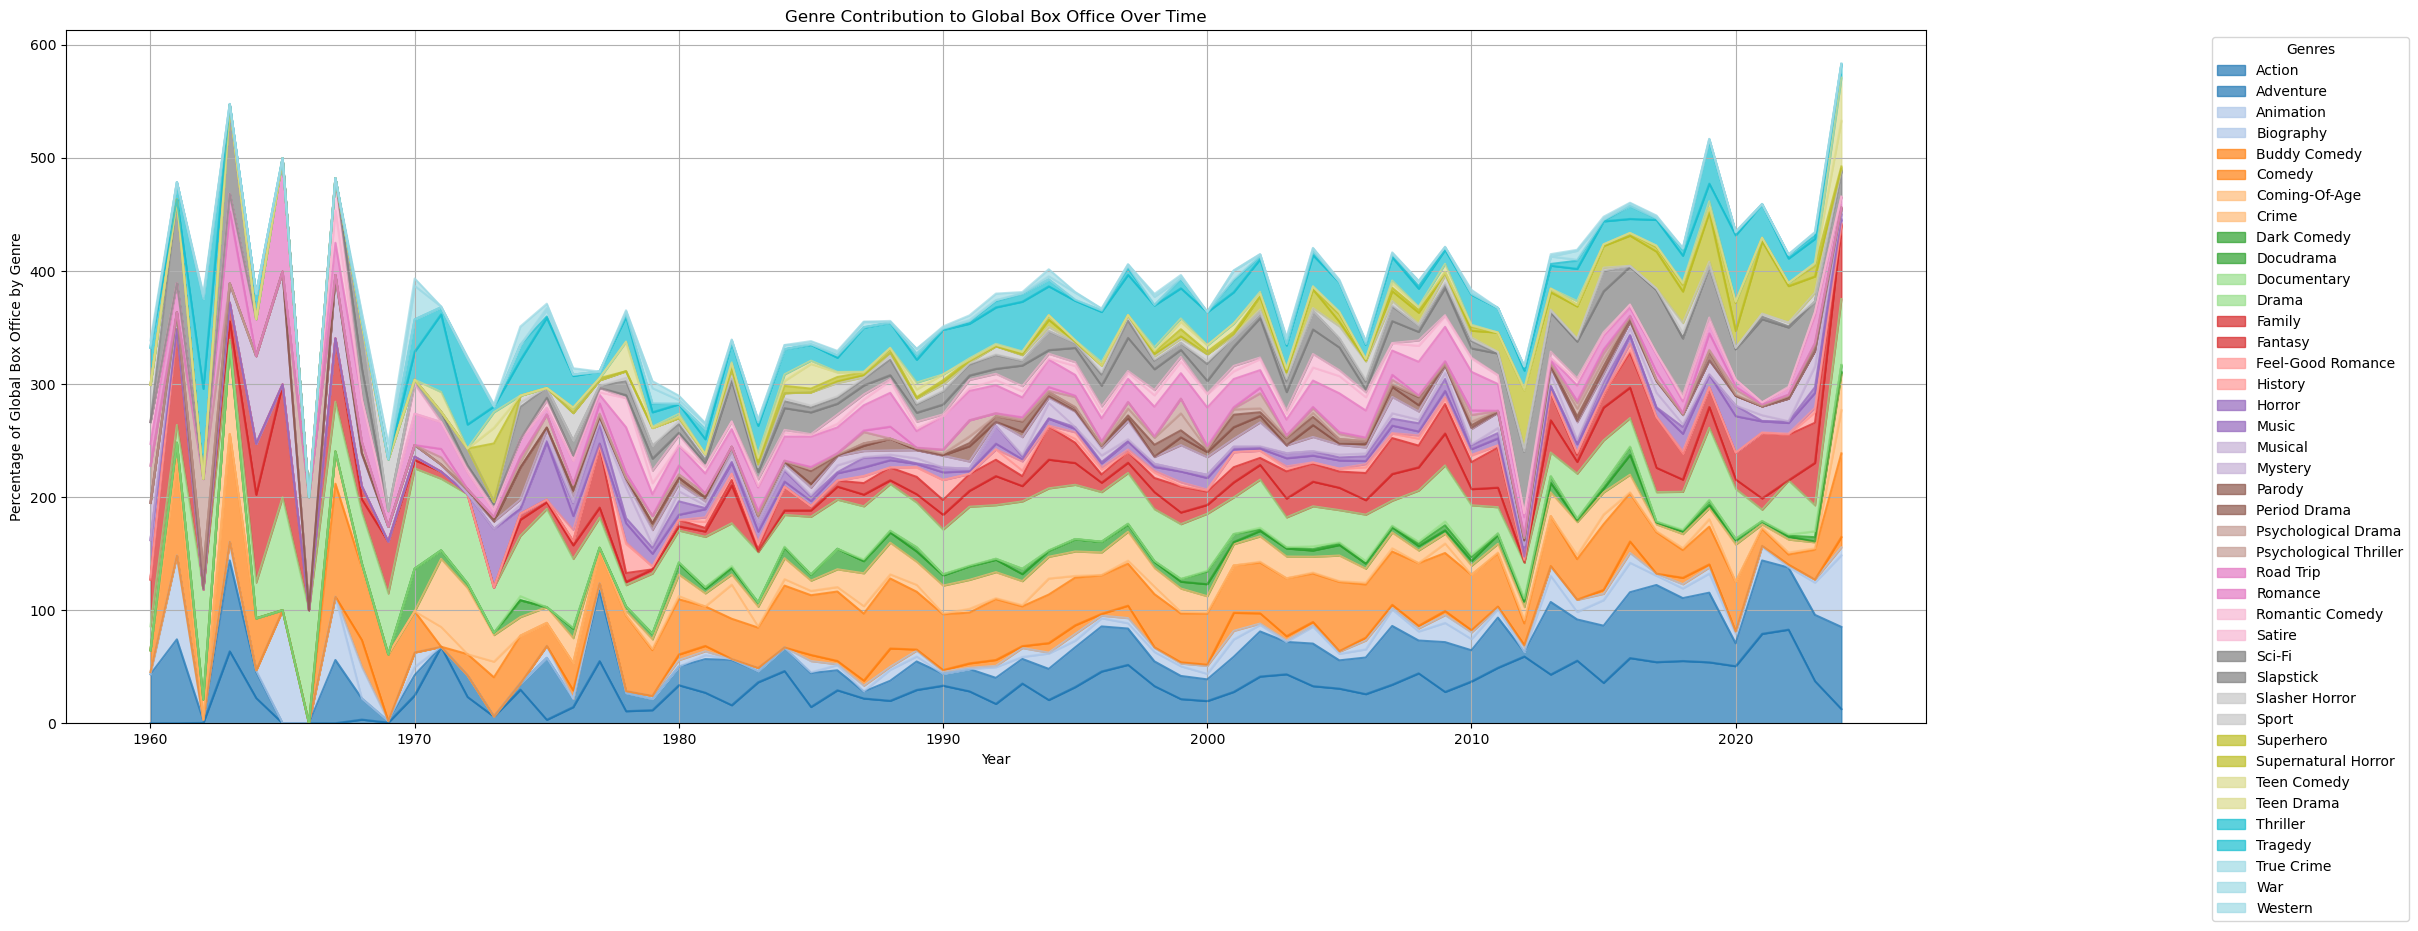

In [9]:
# Filter out genres with fewer than 4 movies per year and genres that are not relevant or redundant
# genre_box_office = genre_box_office[genre_box_office["movie_count"] >= 5]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Animal Adventure"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Buddy Comedy"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Feel-Good Romance"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Docudrama"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Political Thriller"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "News"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Slapstick"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Slasher Horror"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Space Sci-Fi"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Supernatural Horror"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Supernatural Fantasy"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Teen Comedy"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Teen Drama"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Teen Horror"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Coming-Of-Age"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Dark Comedy"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Music"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Satire"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Parody"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Psychological Thriller"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Psychological Drama"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Animation"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "High-Concept Comedy"]
# genre_box_office = genre_box_office[genre_box_office["genres"] != "Conspiracy Thriller"]
# Pivot the data for stacked area chart
pivot_genre = genre_box_office.pivot(index="Year", columns="genres", values="percent_of_total").fillna(0)

# Plot the stacked area chart
plt.figure(figsize=(24, 6))
pivot_genre.plot(kind="area", stacked=True, colormap="tab20", alpha=0.7, figsize=(24, 9))

# Move the legend further to the right
plt.legend(loc="upper left", bbox_to_anchor=(1.15, 1), title="Genres")

# # Twin plot for total box office revenue
# plt.twinx()
# plt.plot(total_box_office_by_year["Year"], total_box_office_by_year["grossWorldWide"], 
#          marker="o", linestyle="-", color="black", label="Total Global Box Office")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Percentage of Global Box Office by Genre")
plt.title("Genre Contribution to Global Box Office Over Time")
plt.grid(True)
# Show the plot
plt.show()


In [10]:
# Convert budget and grossWorldWide to numeric, forcing errors to NaN
imdb_exploded["budget"] = pd.to_numeric(imdb_exploded["budget"], errors="coerce")
imdb_exploded["grossWorldWide"] = pd.to_numeric(imdb_exploded["grossWorldWide"], errors="coerce")

# Filter out movies with missing or zero budget to avoid division errors
imdb_exploded = imdb_exploded[imdb_exploded["budget"] > 0]

# Calculate the budget-to-box-office ratio
imdb_exploded["earnings_ratio"] = imdb_exploded["grossWorldWide"] / imdb_exploded["budget"]

In [11]:
# Define function to assign decade bins
def assign_decade(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Apply function to create a new "Decade" column
imdb_exploded["Decade"] = imdb_exploded["Year"].apply(assign_decade)

# Group by Decade and Genre, calculating the mean earnings ratio
genre_earnings_by_decade = (
    imdb_exploded.groupby(["Decade", "genres"])["earnings_ratio"].mean().reset_index()
)

# Sort values for easier analysis
genre_earnings_by_decade = genre_earnings_by_decade.sort_values(by=["Decade", "earnings_ratio"], ascending=[True, False])

In [12]:
# Get the genre with the highest earnings ratio for each decade
top_genres_per_decade = genre_earnings_by_decade.loc[
    genre_earnings_by_decade.groupby("Decade")["earnings_ratio"].idxmax()
]
# Remove "Radical Wolfe" from the dataset
imdb_exploded = imdb_exploded[~imdb_exploded["Title"].str.contains(r"Radical Wolfe", case=False, na=False)]


print(top_genres_per_decade)

        Decade               genres  earnings_ratio
4    1960-1969         Buddy Comedy       37.106028
67   1970-1979       Slasher Horror      122.215400
83   1980-1989        Coming-Of-Age       15.336720
151  1990-1999  Supernatural Horror      209.530450
192  2000-2009  Supernatural Horror      681.463267
230  2010-2019       Slasher Horror       35.469431
273  2020-2029  Supernatural Horror       23.727486


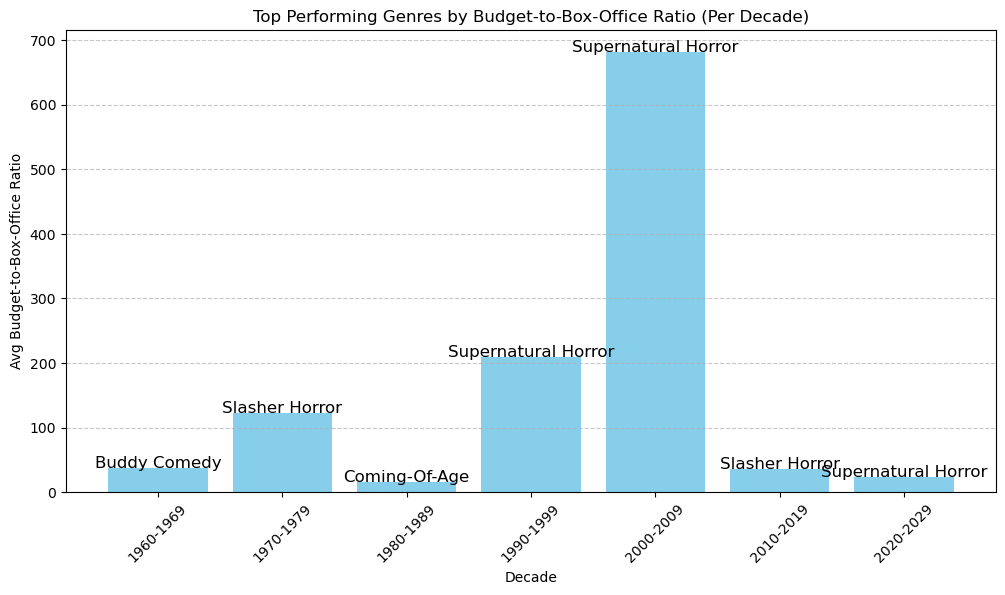

In [13]:
plt.figure(figsize=(12, 6))

# Bar chart of best-performing genre per decade
plt.bar(top_genres_per_decade["Decade"], top_genres_per_decade["earnings_ratio"], color="skyblue")

# Annotate with genre names
for i, row in top_genres_per_decade.iterrows():
    plt.text(row["Decade"], row["earnings_ratio"] + 0.1, row["genres"], ha="center", fontsize=12)

# Labels and title
plt.xlabel("Decade")
plt.ylabel("Avg Budget-to-Box-Office Ratio")
plt.title("Top Performing Genres by Budget-to-Box-Office Ratio (Per Decade)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [14]:
# Get the top 3 genres per decade
top_3_genres_per_decade = genre_earnings_by_decade.sort_values(by=["Decade", "earnings_ratio"], ascending=[True, False])

# Group by "Decade" and take the first 3 entries per group
top_3_genres_per_decade = top_3_genres_per_decade.groupby("Decade").head(3).reset_index(drop=True)

print(top_3_genres_per_decade)

       Decade               genres  earnings_ratio
0   1960-1969         Buddy Comedy       37.106028
1   1960-1969            Animation       36.476969
2   1960-1969        Coming-Of-Age       35.005675
3   1970-1979       Slasher Horror      122.215400
4   1970-1979          Teen Comedy      109.693644
5   1970-1979           Teen Drama       60.967856
6   1980-1989        Coming-Of-Age       15.336720
7   1980-1989    Feel-Good Romance       12.226150
8   1980-1989  Psychological Drama       11.266482
9   1990-1999  Supernatural Horror      209.530450
10  1990-1999               Horror       50.996015
11  1990-1999              Mystery       41.740798
12  2000-2009  Supernatural Horror      681.463267
13  2000-2009               Horror      133.438068
14  2000-2009              Mystery      101.149514
15  2010-2019       Slasher Horror       35.469431
16  2010-2019  Supernatural Horror       23.695855
17  2010-2019               Horror       10.222751
18  2020-2029  Supernatural Hor

C:\Users\Dax J J Kelson\AppData\Local\Temp\ipykernel_14116\682351764.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(unique_genres))  # Using tab20 for a wide range of colors


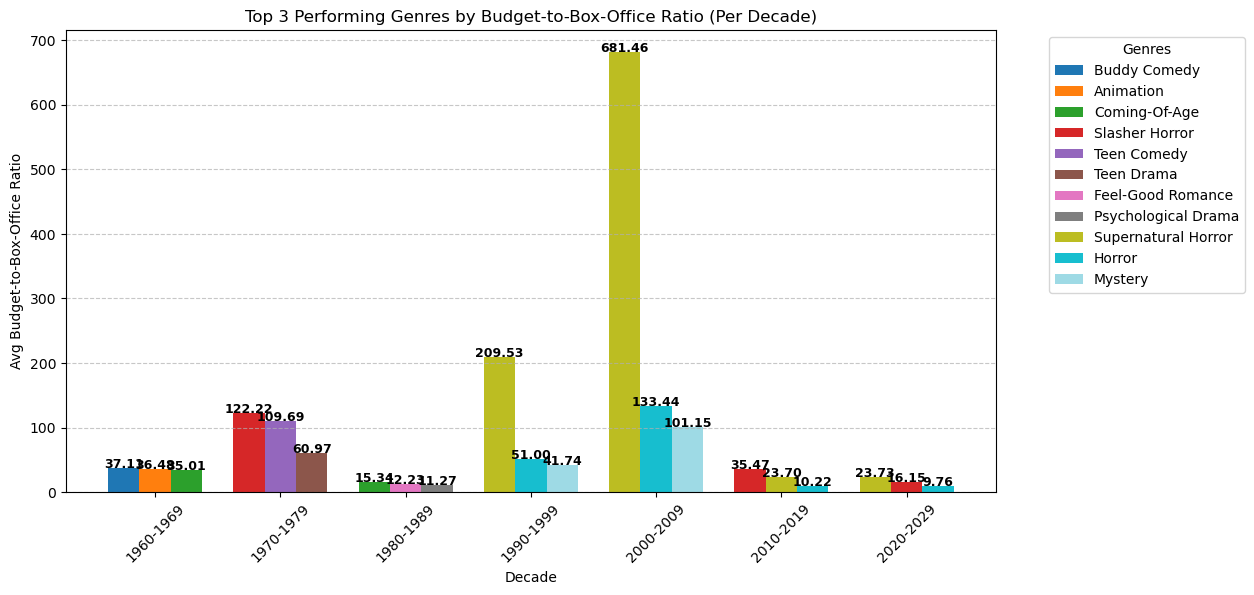

In [19]:
# Get unique decades and genres
decades = top_3_genres_per_decade["Decade"].unique()
unique_genres = top_3_genres_per_decade["genres"].unique()

# Set up figure
plt.figure(figsize=(12, 6))

# Define bar width and offsets for better spacing
bar_width = 0.25
offsets = [-bar_width, 0, bar_width]  # Positioning for the three genres per decade

# Assign unique colors to each genre
colors = plt.cm.get_cmap("tab20", len(unique_genres))  # Using tab20 for a wide range of colors
genre_color_map = {genre: colors(i) for i, genre in enumerate(unique_genres)}

# Dictionary to track which genres have been added to the legend
genre_legend_labels = {}

# Loop through decades and plot bars
for i, decade in enumerate(decades):
    subset = top_3_genres_per_decade[top_3_genres_per_decade["Decade"] == decade].reset_index(drop=True)

    for j in range(len(subset)):
        genre = subset.loc[j, "genres"]
        earnings_ratio = subset.loc[j, "earnings_ratio"]

        # Ensure each genre is correctly labeled in the legend but only once
        legend_label = genre if genre not in genre_legend_labels else None
        genre_legend_labels[genre] = True  # Mark genre as added

        # Plot bar with fixed genre color
        plt.bar(i + offsets[j], earnings_ratio, width=bar_width, color=genre_color_map[genre], label=legend_label)

        # Annotate bars with earnings ratio
        plt.text(
            i + offsets[j], earnings_ratio + 0.1,
            f"{earnings_ratio:.2f}",  # Format to 2 decimal places
            ha="center", fontsize=9, fontweight="bold"
        )

# Labels and title
plt.xlabel("Decade")
plt.ylabel("Avg Budget-to-Box-Office Ratio")
plt.title("Top 3 Performing Genres by Budget-to-Box-Office Ratio (Per Decade)")
plt.xticks(range(len(decades)), decades, rotation=45)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [16]:
top_genres = top_3_genres_per_decade[["Decade", "genres"]]

# Merge to keep only movies from top-performing genres per decade
top_movies = imdb_exploded.merge(top_genres, on=["Decade", "genres"])

# Sort movies by earnings ratio
top_movies = top_movies.sort_values(by=["Decade", "genres", "earnings_ratio"], ascending=[True, True, False])

# Select the top 3 movies per genre per decade
top_3_movies_per_genre_decade = top_movies.groupby(["Decade", "genres"]).head(3).reset_index(drop=True)

# Display the results
print(top_3_movies_per_genre_decade[["Decade", "genres", "Title", "earnings_ratio"]])

       Decade               genres                                Title  \
0   1960-1969            Animation       One Hundred and One Dalmatians   
1   1960-1969            Animation                      The Jungle Book   
2   1960-1969            Animation               The Sword in the Stone   
3   1960-1969         Buddy Comedy                       The Odd Couple   
4   1960-1969        Coming-Of-Age                         The Graduate   
5   1970-1979       Slasher Horror         The Texas Chain Saw Massacre   
6   1970-1979       Slasher Horror                            Halloween   
7   1970-1979       Slasher Horror                              Sisters   
8   1970-1979          Teen Comedy                    American Graffiti   
9   1970-1979          Teen Comedy                               Grease   
10  1970-1979           Teen Drama                    American Graffiti   
11  1970-1979           Teen Drama                The Last Picture Show   
12  1970-1979           T

C:\Users\Dax J J Kelson\AppData\Local\Temp\ipykernel_14116\3544886514.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(unique_genres))  # Generate distinct colors


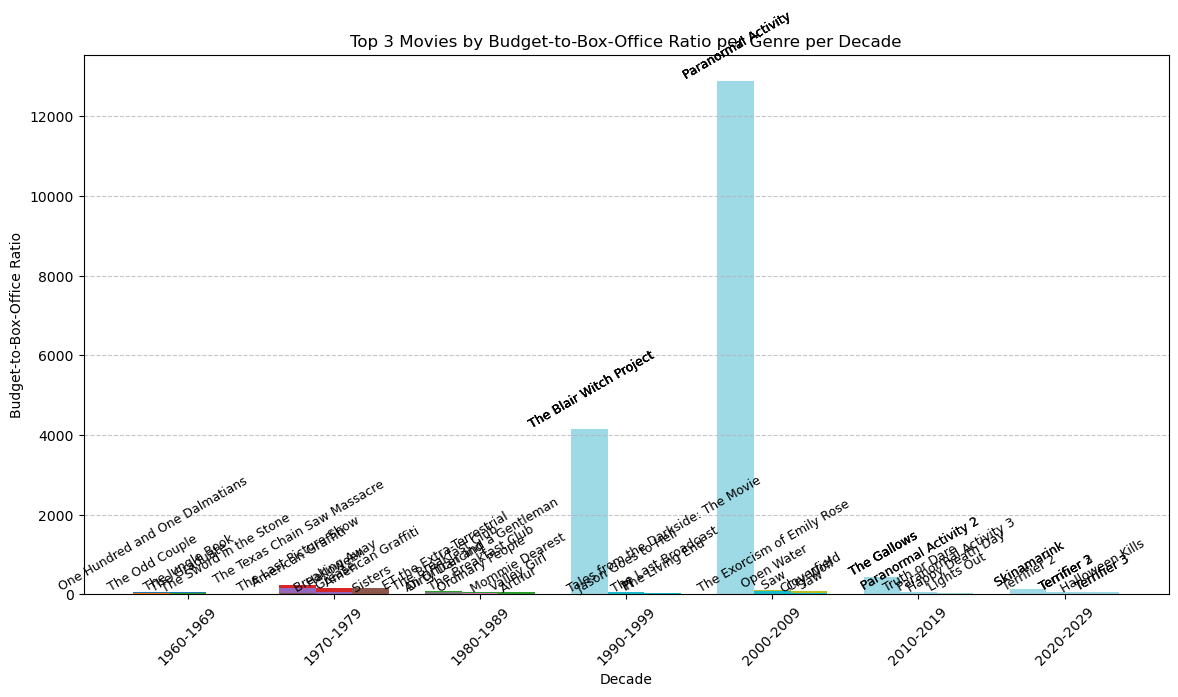

In [17]:
# Set up figure
plt.figure(figsize=(14, 7))

# Define bar width and offsets for spacing
bar_width = 0.25
offsets = [-bar_width, 0, bar_width]  # Three movies per genre

# Get unique decades
decades = top_3_movies_per_genre_decade["Decade"].unique()

# Dictionary to track unique colors per genre
genre_colors = {}

# Assign colors to genres dynamically
unique_genres = top_3_movies_per_genre_decade["genres"].unique()
colors = plt.cm.get_cmap("tab20", len(unique_genres))  # Generate distinct colors

for i, genre in enumerate(unique_genres):
    genre_colors[genre] = colors(i)

# Loop through decades and genres to plot movies
for i, decade in enumerate(decades):
    subset = top_3_movies_per_genre_decade[top_3_movies_per_genre_decade["Decade"] == decade]

    for j, (index, row) in enumerate(subset.iterrows()):
        genre = row["genres"]
        label = row["Title"]  # Movie title as label

        plt.bar(i + offsets[j % 3], row["earnings_ratio"], width=bar_width, color=genre_colors[genre])

        # Annotate each bar with the movie title
        plt.text(
            i + offsets[j % 3], row["earnings_ratio"] + 0.1,
            label, ha="center", fontsize=9, rotation=30
        )

# Labels and title
plt.xlabel("Decade")
plt.ylabel("Budget-to-Box-Office Ratio")
plt.title("Top 3 Movies by Budget-to-Box-Office Ratio per Genre per Decade")
plt.xticks(range(len(decades)), decades, rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()